# First things first

Welcome to our very first introduction to *Tensor Fox*, a specialized library made to deal with tensors of any order with focus on the CPD (Canonical Polyadic Decomposition). To be able to use Tensor Fox properly you will need the following modules:

- numpy

- pandas

- scipy

- sklearn

- matplotlib

- numba

Make sure Numba and Numpy are up to date. Additionaly, make sure you are using a nice BLAS version. That is all! Tensor Fox is read to go! Let's start importing Tensor Fox and other necessary modules for this first lesson.

In [1]:
import numpy as np
import TensorFox as tfx

# Creating your tensor

Let's create a little tensor $T$ just to see how Tensor Fox works at its basics. For third order tensors (3D arrays) I use the convention that $T_{ijk}$ refers to the $i$-th row, $j$-column and $k$-slice (frontal slice) of $T$. For instance, consider the tensor defined above (the frontal slices of $T$ are showed)

$$T = \left\{ \left[
\begin{array}{cc}
    0 & 1\\
    2 & 3
\end{array}
\right], \quad
\left[
\begin{array}{cc}
    4 & 5\\
    6 & 7
\end{array}
\right] \right\}.$$

This particular tensor will be our toy model through all lessons.

In [2]:
# Create a 2 x 2 x 2 tensor.
m = 2
T = np.zeros((m, m, m))
s = 0

for k in range(m):
    for i in range(m):
        for j in range(m):
            T[i,j,k] = s
            s += 1

There are a lot of questions we can make about a given tensor $T$. What are its maximum and minimum entries, what are the dimensions of $T$, the rank and multirank, etc. Even in the case of the simple tensor above we can't know all these answers in advance. The function **infotens** shows lots of information about $T$ for your convenience. This function is useful for small tensors, but remember that finding the rank is a NP-hard task, so don't abuse. 

T is a tensor of dimensions (2, 2, 2)

|T| = 11.832159566199232

max(T) = 7.0

min(T) = 0.0

mean(T) = 3.5

mean(|T|) = 3.5

var(T) = 5.25



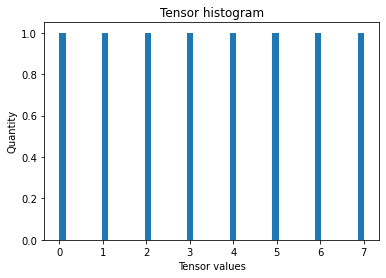


1 <= rank(T) <= 4

Generic rank of the tensor space of T = 2

Computing multilinear rank...
------------------------------------
    Compressing unfolding mode 1
    Compressing unfolding mode 2
    Compressing unfolding mode 3
multirank(T) = (2, 2, 2)
|T - (U_1, ..., U_3)*S|/|T| = 9.987159834212956e-16

Computing rank...
Start searching for rank
Stops at R = 4  or less
-----------------------------
Testing R = 3
rank(T) = 3
|T - T_approx|/|T| = 9.25936271758154e-16



In [3]:
# Let's see some information about T.
tfx.infotens(T)

# Computing the CPD

Now let's turn to the most important tool of Tensor Fox, the computation of the CPD. As the previous function hinted, $T$ should have rank 3. We can compute the corresponding CPD with the function **cpd**. Since Tensor Fox is compiled, the first run is slower than the remaining ones. Don't forget that.

In [4]:
# Compute the CPD of T, assuming T has rank 3.
R = 3
factors, output = tfx.cpd(T, R)

# 'factors' is the list of the factor matrices associated with the CPD.
X = factors[0]
Y = factors[1]
Z = factors[2]

# Show the CPD computed. 
print('X =\n', X)
print()
print('Y =\n', Y)
print()
print('Z =\n', Z)
print()

# Show the coordinate representation of this CPD.
print('T_approx =')
T_approx = tfx.cpd2tens(factors)
tfx.showtens(T_approx)

# Show relative error of this approximation.
print('|T - T_approx|/|T| =', output.rel_error)

X =
 [[ 1.38570351 -0.85627676 -0.02444902]
 [ 1.60956016 -0.5509813  -1.50716444]]

Y =
 [[ 1.4597421   0.56420558  0.96939969]
 [ 1.54272847 -0.84762158  1.1542992 ]]

Z =
 [[ 0.1777078   0.8055931  -1.25451327]
 [ 2.11643051  0.62274397 -0.83566671]]

T_approx =
[[-1.40859546e-15  1.00000000e+00]
 [ 2.00000000e+00  3.00000000e+00]]

[[4. 5.]
 [6. 7.]]

|T - T_approx|/|T| = 5.668021858984811e-16


If it is convenient to use normalized factors, we can convert everything to the format $\Lambda, X, Y, Z$, where the columns of $X, Y, Z$ are unit norm and their magnitudes are passed to the central tensor $\Lambda \in \mathbb{R}^{R \times R \times R}$. Since $\Lambda$ is a diagonal tensor, we can store its values as a unidimensional array of size $R$. This is made such that
$$T \approx \sum_{r=1}^R \Lambda_r \ X_{:, r} \otimes Y_{:, r} \otimes Z_{:, r}.$$

We denote this relation as $T \approx (X, Y, Z) \cdot \Lambda$, the multilinear multiplication. With a simple command we can obtain this factorization.

In [5]:
Lambda, factors = tfx.normalize(factors)
X = factors[0]
Y = factors[1]
Z = factors[2]

print('Lambda =\n', Lambda)
print()
print('X =\n', X)
print()
print('Y =\n', Y)
print()
print('Z =\n', Z)
print()

Lambda =
 [9.5805128  1.05568994 3.42494276]

X =
 [[ 0.65244023 -0.84094714 -0.01621973]
 [ 0.75784018 -0.54111728 -0.99986845]]

Y =
 [[ 0.68730033  0.55410481  0.64310977]
 [ 0.72637336 -0.83244691  0.76577401]]

Z =
 [[ 0.08367137  0.79117084 -0.83225706]
 [ 0.9964934   0.61159521 -0.55438992]]

